## 01 Desafio 

In [9]:
# Importando dados 
import pandas as pd
dados = pd.read_json("dados_desafio.json", encoding="latin1")
dados

,nome,idade,enderecos
0,JoÃ£o,28,"{'tipo': 'casa', 'rua': 'Rua A', 'numero': 123..."
1,JoÃ£o,28,"{'tipo': 'trabalho', 'rua': 'Rua B', 'numero':..."


In [10]:
# Normalizando o dataframe
import json 

with open('dados_desafio.json',  encoding="utf-8") as d:
    json_bruto = json.load(d)

dados = pd.json_normalize(json_bruto, meta = ["nome","idade"], record_path='enderecos')
dados

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


## 02 Desafio

Sua tarefa é realizar alguns tratamentos e deixar esse arquivo JSON como um Pandas DataFrame, sem dados vazios e com a tipagem das colunas de forma correta.

In [13]:
dados02 = pd.read_json('dados02desafio.json')
dados02

,pessoas
0,"{'nome': 'João', 'idade': '25', 'endereco': {'..."
1,"{'nome': 'Maria', 'idade': 30, 'endereco': {'r..."


In [14]:
import pandas as pd

dados02 = pd.json_normalize(dados02['pessoas'])
dados02

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [15]:
dados02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 228.0+ bytes


In [16]:
dados02['idade'] = dados02['idade'].astype(int)
dados02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      int32 
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int32(1), int64(1), object(4)
memory usage: 220.0+ bytes


In [17]:
dados02 = dados02[dados02['endereco.rua'] != '']

In [18]:
dados02

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


## 03 Desafio

In [20]:
import pandas as pd
import json 

with open('dados03desafio.json',  encoding="utf-8") as d:
    json_bruto = json.load(d)

dados03 = pd.json_normalize(json_bruto, meta = ["curso","categoria"])
dados03

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


#### Para resolver isso, foi solicitado que você identifique e remova as amostras que apresentam os seguintes problemas:

#### Valores nulos: são valores ausentes em algumas das colunas que devem ser preenchidos para que a análise seja correta.

In [23]:
#Verificando quais colunas contem valores nulos
dados03.isna().sum()

curso                 0
categoria             0
carga_horaria         1
concluintes           1
data_inicio           1
data_conclusao        1
descricao             1
preco                 1
instrutor.nome        0
instrutor.email       0
instrutor.telefone    0
dtype: int64

In [24]:
# Visualizando registro que tenha valores nulos
dados03[dados03.isna().any(axis=1)]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888


In [25]:
# Removendo registros que tenha valores nulo
dados03.dropna(axis=0, inplace=True)

dados03

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


#### Duplicatas: registros iguais que podem prejudicar a análise dos dados, já que estão representando a mesma informação.

In [27]:
#Visualiziando valores duplicado
filtro_duplicado = dados03.duplicated()

dados03[filtro_duplicado]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [28]:
#Removendo registro duplicados
dados03.drop_duplicates(inplace=True)

dados03

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,


#### Strings vazias: valores de texto que não apresentam nenhum conteúdo escrito, o que pode dificultar a análise de dados, principalmente se a coluna tiver muitos valores assim.

In [30]:
# Visualizando registro vazios
filtro_vazio = (dados03 == '')

dados03[filtro_vazio]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,,NaN,,NaN,NaN,,NaN,
4,NaN,NaN,NaN,NaN,,,NaN,NaN,NaN,,


In [31]:
# Substituindo valores vazio para nulos
import numpy as np

dados03.replace(r'', np.nan, inplace=True)
dados03

C:\Users\emanu\AppData\Local\Temp\ipykernel_16208\1629824764.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados03.replace(r'', np.nan, inplace=True)


,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100.0,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75.0,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,NaN,2022-04-01,NaN,Curso avançado sobre inteligência artificial c...,129.9,NaN,contato@emailaleatorio.com,NaN
4,Inglês para negócios,Idiomas,20 horas,30.0,NaN,NaN,Curso de inglês para negócios,69.9,John Smith,NaN,NaN


In [32]:
#Removendo valores nulos
dados03.dropna(inplace=True)

dados03

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100.0,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75.0,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


#### Conversão de tipos: algumas colunas do arquivo podem estar no tipo de dados errado, como texto em vez de número, o que pode prejudicar a análise. Nesse caso você deve realizar a conversão para o tipo correto de cada coluna.


In [34]:
dados03.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   curso               2 non-null      object 
 1   categoria           2 non-null      object 
 2   carga_horaria       2 non-null      object 
 3   concluintes         2 non-null      float64
 4   data_inicio         2 non-null      object 
 5   data_conclusao      2 non-null      object 
 6   descricao           2 non-null      object 
 7   preco               2 non-null      object 
 8   instrutor.nome      2 non-null      object 
 9   instrutor.email     2 non-null      object 
 10  instrutor.telefone  2 non-null      object 
dtypes: float64(1), object(10)
memory usage: 192.0+ bytes


In [35]:
dados03

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100.0,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75.0,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [36]:
# Alterando as colunas abaixos, para seus tipo corretos
dados03['concluintes'] = dados03['concluintes'].astype(int)
dados03['preco'] = dados03['preco'].astype(float)

In [37]:
#Alterando coluna de datas, para tipo correto.
dados03['data_inicio'] = pd.to_datetime(dados03['data_inicio'], format='%Y-%m-%d')
dados03['data_conclusao'] = pd.to_datetime(dados03['data_conclusao'], format='%Y-%m-%d')


In [38]:
#Resetando o index,
dados03.reset_index(drop=True, inplace=True)

In [39]:
dados03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int32         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 300.0+ bytes


In [40]:
dados03

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.9,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


## Desafio 04

Sua missão é construir uma função que recebe dois parâmetros, a coluna que você quer analisar se tem outlier e o DataFrame em questão. A intenção de fazer isso é aproveitar novamente essa função tanto para outras colunas quanto para outros DataFrames futuramente em outras análises. O método que deve ser implementado para identificação do outlier é do intervalo interquartil

In [43]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
dados04 = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150, 
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250, 
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil', 
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})
dados04.head()

,ID da transação,Valor da transação,Data da transação,Local da transação
0,1,100,2022-01-01,"São Paulo, Brasil"
1,2,200,2022-01-02,"Rio de Janeiro, Brasil"
2,3,150,2022-01-03,"Belo Horizonte, Brasil"
3,4,500,2022-01-04,"São Paulo, Brasil"
4,5,300,2022-01-05,"São Paulo, Brasil"


In [80]:
def identificar_outliers(nome_coluna, dados):
    serie = dados[nome_coluna] 
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IIQ = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ
    
    return dados[(serie < limite_inferior) | (serie > limite_superior)]

Tive que colocar 'dados[nome_coluna]' em uma variavel, pois o metado '.quantile()' não atribui em valores 'str'

In [83]:
#Testando a função 
identificar_outliers('Valor da transação', dados04)

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"


<Axes: xlabel='Valor da transação'>

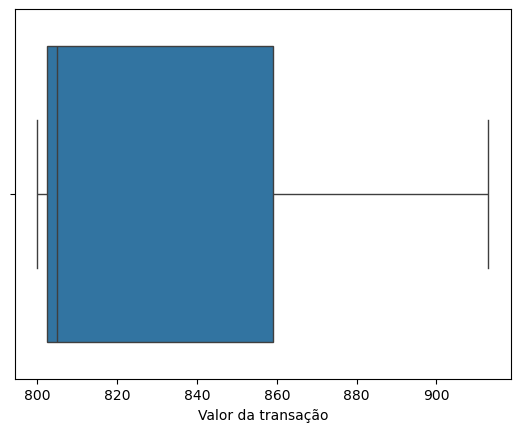

In [87]:
import seaborn as sns

sns.boxplot(x= identificar_outliers('Valor da transação', dados04)['Valor da transação'])